In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

ModuleNotFoundError: No module named 'seaborn'

In [109]:
data = pd.read_csv(r"C:\Users\SURUJ_KALITA\lr-in\gan-in-tabular-data\7th-sem\Data.csv")
data

,SL NO,From Date,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF
0,1,18-02-2019 00:00,58.04,81.06,1.81,6.4,9.66,27.18,13.77,0.49,15.73,0.92,None,0.33,1.86,229.44,0.22,1002.19,20.87,0
1,2,18-02-2019 01:00,60,82.39,1.91,6.08,9.7,26.46,13.64,0.44,18.36,0.84,None,0.29,1.54,217.2,1.46,956,18.92,0.24
2,3,18-02-2019 02:00,55.5,73.42,2.22,6.71,10.86,27.06,13.64,0.44,34.54,0.77,None,0.23,0.66,197.21,None,1001.6,18.33,0
3,4,18-02-2019 03:00,66.56,96.04,2.79,7,12.1,26.34,13.72,0.45,31.85,0.82,None,0.21,0.61,206.44,None,1001.41,17.63,0
4,5,18-02-2019 04:00,67.08,97.21,3.29,9.45,15.53,25.16,13.8,0.47,24.07,0.74,None,0.22,0.54,230.53,None,980.67,16.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33062,33063,30-12-2022 20:00,295.72,371.83,5.54,2.62,5.41,16.13,13.91,2.64,22.82,2.96,3.16,3.37,0.31,168.12,None,1009.22,15.96,0
33063,33064,30-12-2022 21:00,362.6,448.5,5.61,2.62,5.46,17.45,13.88,2.79,5.66,3.12,3.34,3.56,0.69,132.27,11.17,967.18,14.93,0.48
33064,33065,30-12-2022 22:00,277.86,353.78,5.52,2.46,5.29,17.92,13.74,3.25,22.64,3.64,3.89,4.15,0.36,173.64,None,1009.11,15.22,0
33065,33066,30-12-2022 23:00,380,450.48,5.46,2.47,5.32,18.01,14.12,3.28,7.07,3.68,3.94,4.21,0.82,163.19,9.57,912.74,13.45,1.09


In [15]:
df = pd.read_csv(r"C:\Users\SURUJ_KALITA\lr-in\gan-in-tabular-data\7th-sem\Data.csv" , index_col='From Date',parse_dates=True)
df

,SL NO,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF
From Date,,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,1,58.04,81.06,1.81,6.4,9.66,27.18,13.77,0.49,15.73,0.92,None,0.33,1.86,229.44,0.22,1002.19,20.87,0
2019-02-18 01:00:00,2,60,82.39,1.91,6.08,9.7,26.46,13.64,0.44,18.36,0.84,None,0.29,1.54,217.2,1.46,956,18.92,0.24
2019-02-18 02:00:00,3,55.5,73.42,2.22,6.71,10.86,27.06,13.64,0.44,34.54,0.77,None,0.23,0.66,197.21,None,1001.6,18.33,0
2019-02-18 03:00:00,4,66.56,96.04,2.79,7,12.1,26.34,13.72,0.45,31.85,0.82,None,0.21,0.61,206.44,None,1001.41,17.63,0
2019-02-18 04:00:00,5,67.08,97.21,3.29,9.45,15.53,25.16,13.8,0.47,24.07,0.74,None,0.22,0.54,230.53,None,980.67,16.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,33063,295.72,371.83,5.54,2.62,5.41,16.13,13.91,2.64,22.82,2.96,3.16,3.37,0.31,168.12,None,1009.22,15.96,0
2022-12-30 21:00:00,33064,362.6,448.5,5.61,2.62,5.46,17.45,13.88,2.79,5.66,3.12,3.34,3.56,0.69,132.27,11.17,967.18,14.93,0.48
2022-12-30 22:00:00,33065,277.86,353.78,5.52,2.46,5.29,17.92,13.74,3.25,22.64,3.64,3.89,4.15,0.36,173.64,None,1009.11,15.22,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33067 entries, 2019-02-18 00:00:00 to 2022-12-31 00:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SL NO        33067 non-null  int64 
 1   PM2.5        33067 non-null  object
 2   PM10         33067 non-null  object
 3   NO           33067 non-null  object
 4   NO2          33067 non-null  object
 5   Nox          33067 non-null  object
 6   NH3          33067 non-null  object
 7   SO2          33067 non-null  object
 8   CO           33067 non-null  object
 9   Ozone        33067 non-null  object
 10  Benzene      33067 non-null  object
 11  Eth-Benzene  33067 non-null  object
 12  MP-Xylene    33067 non-null  object
 13  WS           33067 non-null  object
 14  WD           33067 non-null  object
 15  SR           33067 non-null  object
 16  BP           33067 non-null  object
 17  AT           33067 non-null  object
 18  RF           33067 non-null  ob

In [17]:
df.describe()

,SL NO
count,33067.000000
mean,16534.000000
std,9545.765012
min,1.000000
25%,8267.500000
50%,16534.000000
75%,24800.500000
max,33067.000000


In [23]:
# df.drop('SL NO',inplace=True,axis=1)
# # df.drop('Nox',inplace=True, axix = 1)  ##once excuted cant run again

In [24]:
df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF
From Date,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,58.04,81.06,1.81,6.4,9.66,27.18,13.77,0.49,15.73,0.92,None,0.33,1.86,229.44,0.22,1002.19,20.87,0
2019-02-18 01:00:00,60,82.39,1.91,6.08,9.7,26.46,13.64,0.44,18.36,0.84,None,0.29,1.54,217.2,1.46,956,18.92,0.24
2019-02-18 02:00:00,55.5,73.42,2.22,6.71,10.86,27.06,13.64,0.44,34.54,0.77,None,0.23,0.66,197.21,None,1001.6,18.33,0
2019-02-18 03:00:00,66.56,96.04,2.79,7,12.1,26.34,13.72,0.45,31.85,0.82,None,0.21,0.61,206.44,None,1001.41,17.63,0
2019-02-18 04:00:00,67.08,97.21,3.29,9.45,15.53,25.16,13.8,0.47,24.07,0.74,None,0.22,0.54,230.53,None,980.67,16.61,0


In [27]:
df['PM2.5'].unique()


array(['58.04', '60', '55.5', ..., '362.6', '277.86', '380'], dtype=object)

In [28]:
df['NO2'].unique()

array(['6.4', '6.08', '6.71', ..., '0.77', '0.71', '2.53'], dtype=object)

In [29]:
df['SO2'].unique()

array(['13.77', '13.64', '13.72', ..., '35.21', '8.61', '5.88'],
      dtype=object)

In [31]:
df['SR'].unique()

array(['0.22', '1.46', 'None', ..., '421.59', '279.79', '113.21'],
      dtype=object)

In [35]:
df['PM10'].unique()

array([ 81.06,  82.39,  73.42, ..., 448.5 , 353.78, 450.48])

In [38]:
df['AT'].unique()

array(['20.87', '18.92', '18.33', ..., '34.36', '28.81', '6.17'],
      dtype=object)

In [39]:
df['RF'].unique()

array(['0', '0.24', '0.48', '0.21', '0.41', '2', '0.45', '0.26', '0.22',
       '0.04', '0.27', '0.43', '0.53', nan, '0.23', '0.29', '0.67',
       '0.25', '0.7', '0.84', '0.51', '1.44', '0.96', '0.47', '0.01',
       '0.69', '0.46', '0.65', '1.93', '0.36', '2.21', '0.5', '1.36',
       '1.1', '0.32', '0.55', '0.94', '1.7', '0.56', '2.1', '1.16',
       '0.58', '0.87', '1.66', '0.15', '0.2', '0.42', '1.58', '0.85',
       '1.71', '1.14', '0.54', '1.52', '1.67', '0.86', '1.33', '1.77',
       '0.17', '1.29', '0.02', '0.03', '0.92', '0.33', '0.1', '0.08',
       '0.72', '0.83', '3.19', '0.64', '1.65', '1.69', '0.19', '2.88',
       '1.88', '1.02', '1.8', '0.38', '0.39', '1.06', '2.71', '0.31',
       '2.62', '1.72', '1.51', '0.52', '1.85', '0.78', '1', '2.56',
       '1.54', '0.74', '1.79', '1.12', '2.17', '0.66', '0.44', '0.79',
       '0.61', '0.06', '0.77', '1.25', '0.81', '1.99', '1.6', '0.57',
       '1.39', '1.11', '0.73', '1.03', '0.49', '0.98', '2.41', '0.68',
       '2.23', '1.4

In [40]:
df['SR'].unique()

array(['0.22', '1.46', nan, ..., '421.59', '279.79', '113.21'],
      dtype=object)

In [41]:
df['BP']=pd.to_numeric(df['BP'])

In [32]:
##rEPACLING NONE values

df=df.replace(['None'],np.NaN)

In [42]:
df['PM2.5']=pd.to_numeric(df['PM2.5'])
df['PM10']=pd.to_numeric(df['PM10'])
df['NO2']=pd.to_numeric(df['NO2'])
df['SO2']=pd.to_numeric(df['SO2'])
df['WS']=pd.to_numeric(df['WS'])
df['WD']=pd.to_numeric(df['WD'])
df['AT']=pd.to_numeric(df['AT'])
df['RF']=pd.to_numeric(df['RF'])
df['SR']=pd.to_numeric(df['SR'])
df['BP']=pd.to_numeric(df['BP'])

In [43]:
df.isnull()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF
From Date,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2019-02-18 01:00:00,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2019-02-18 02:00:00,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
2019-02-18 03:00:00,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
2019-02-18 04:00:00,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2022-12-30 21:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2022-12-30 22:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [45]:
df.isnull().sum()  ##missing values 

PM2.5           1816
PM10            1277
NO              1671
NO2              674
Nox              451
NH3             1362
SO2              475
CO               451
Ozone            594
Benzene         2106
Eth-Benzene    16617
MP-Xylene      10408
WS              1584
WD              1539
SR             12883
BP             11191
AT              1605
RF               444
dtype: int64

In [49]:
#(df==0).sum(axis=0)
def missing_zero_values_table(df):
        zero_val = (df == 0).astype(int).sum(axis=0)
        mz_table = pd.concat([zero_val], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values'})
        
        return mz_table

missing_zero_values_table(df)

,Missing Values
PM2.5,0
PM10,0
NO,0
NO2,0
Nox,0
NH3,0
SO2,0
CO,0
Ozone,0
Benzene,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33067 entries, 2019-02-18 00:00:00 to 2022-12-31 00:00:00
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5        31251 non-null  float64
 1   PM10         31790 non-null  float64
 2   NO           31396 non-null  object 
 3   NO2          32393 non-null  float64
 4   Nox          32616 non-null  object 
 5   NH3          31705 non-null  object 
 6   SO2          32592 non-null  float64
 7   CO           32616 non-null  object 
 8   Ozone        32473 non-null  object 
 9   Benzene      30961 non-null  object 
 10  Eth-Benzene  16450 non-null  object 
 11  MP-Xylene    22659 non-null  object 
 12  WS           31483 non-null  float64
 13  WD           31528 non-null  float64
 14  SR           20184 non-null  float64
 15  BP           21876 non-null  float64
 16  AT           31462 non-null  float64
 17  RF           32623 non-null  float64
dtypes: float64(

In [51]:

df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['WS']=df['WS'].fillna(df['WS'].mean())
df['WD']=df['WD'].fillna(df['WD'].mean())
df['AT']=df['AT'].fillna(df['AT'].mean())
df['SR']=df['SR'].fillna(df['SR'].mean())
df['BP']=df['BP'].fillna(df['BP'].mean())


In [52]:
df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF
From Date,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,58.04,81.06,1.81,6.40,9.66,27.18,13.77,0.49,15.73,0.92,NaN,0.33,1.86,229.44,0.220000,1002.19,20.87,0.00
2019-02-18 01:00:00,60.00,82.39,1.91,6.08,9.7,26.46,13.64,0.44,18.36,0.84,NaN,0.29,1.54,217.20,1.460000,956.00,18.92,0.24
2019-02-18 02:00:00,55.50,73.42,2.22,6.71,10.86,27.06,13.64,0.44,34.54,0.77,NaN,0.23,0.66,197.21,241.906008,1001.60,18.33,0.00
2019-02-18 03:00:00,66.56,96.04,2.79,7.00,12.1,26.34,13.72,0.45,31.85,0.82,NaN,0.21,0.61,206.44,241.906008,1001.41,17.63,0.00
2019-02-18 04:00:00,67.08,97.21,3.29,9.45,15.53,25.16,13.80,0.47,24.07,0.74,NaN,0.22,0.54,230.53,241.906008,980.67,16.61,0.00


In [54]:
(df==0).sum(axis=0)

PM2.5              0
PM10               0
NO                 0
NO2                0
Nox                0
NH3                0
SO2                0
CO                 0
Ozone              0
Benzene            0
Eth-Benzene        0
MP-Xylene          0
WS                 0
WD                 0
SR                 0
BP                 0
AT                 0
RF             26730
dtype: int64

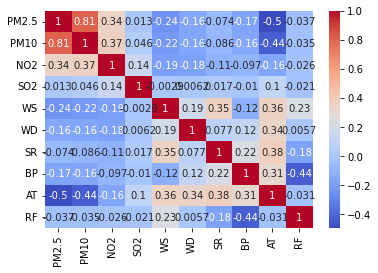

In [58]:
corrmat=df.corr()  ##Correlation mapping seaborn heatmap
sns.heatmap(corrmat,annot=True,cmap='coolwarm')
plt.show()


C:\Users\SURUJ_KALITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SR'>

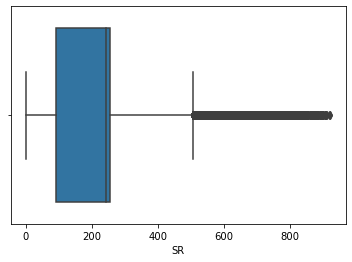

In [60]:
#checking outliers
sns.boxplot(df['SR'])

In [62]:
df1=df['PM10']   ##pm10 column


In [63]:
def findoutliers(df1):
    q1=df1.quantile(0.25)
    q3=df1.quantile(0.75)
    IQR=q3-q1
    outliers=df1[((df1<q1-1.5*IQR)|(df1>q3+1.5*IQR))]
    return outliers

In [66]:
df

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF
From Date,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,58.04,81.06,1.81,6.400000,9.66,27.18,13.770000,0.49,15.73,0.92,NaN,0.33,1.86,229.44,0.220000,1002.190000,20.87,0.00
2019-02-18 01:00:00,60.00,82.39,1.91,6.080000,9.7,26.46,13.640000,0.44,18.36,0.84,NaN,0.29,1.54,217.20,1.460000,956.000000,18.92,0.24
2019-02-18 02:00:00,55.50,73.42,2.22,6.710000,10.86,27.06,13.640000,0.44,34.54,0.77,NaN,0.23,0.66,197.21,241.906008,1001.600000,18.33,0.00
2019-02-18 03:00:00,66.56,96.04,2.79,7.000000,12.1,26.34,13.720000,0.45,31.85,0.82,NaN,0.21,0.61,206.44,241.906008,1001.410000,17.63,0.00
2019-02-18 04:00:00,67.08,97.21,3.29,9.450000,15.53,25.16,13.800000,0.47,24.07,0.74,NaN,0.22,0.54,230.53,241.906008,980.670000,16.61,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,295.72,371.83,5.54,2.620000,5.41,16.13,13.910000,2.64,22.82,2.96,3.16,3.37,0.31,168.12,241.906008,1009.220000,15.96,0.00
2022-12-30 21:00:00,362.60,448.50,5.61,2.620000,5.46,17.45,13.880000,2.79,5.66,3.12,3.34,3.56,0.69,132.27,11.170000,967.180000,14.93,0.48
2022-12-30 22:00:00,277.86,353.78,5.52,2.460000,5.29,17.92,13.740000,3.25,22.64,3.64,3.89,4.15,0.36,173.64,241.906008,1009.110000,15.22,0.00


In [67]:
outliers=findoutliers(df['PM10'])
print("no of outliers"+str(len(outliers)))
print("max outlier value "+str(outliers.max()))
print("min outlier value "+str(outliers.min()))


no of outliers2368
max outlier value 1000.0
min outlier value 312.75


In [69]:
df1   ##PM10

From Date
2019-02-18 00:00:00     81.06
2019-02-18 01:00:00     82.39
2019-02-18 02:00:00     73.42
2019-02-18 03:00:00     96.04
2019-02-18 04:00:00     97.21
                        ...  
2022-12-30 20:00:00    371.83
2022-12-30 21:00:00    448.50
2022-12-30 22:00:00    353.78
2022-12-30 23:00:00    450.48
2022-12-31 00:00:00    389.00
Name: PM10, Length: 33067, dtype: float64

In [72]:
q3=df1.quantile(0.75)
q1=df1.quantile(0.25)
IQR=q3-q1
r=q3+1.5*IQR
df1[df1>r]

##Outlier Removing


From Date
2019-02-21 19:00:00    438.48
2019-02-21 20:00:00    440.13
2019-02-21 21:00:00    331.37
2019-02-21 22:00:00    351.45
2019-02-21 23:00:00    327.00
                        ...  
2022-12-30 20:00:00    371.83
2022-12-30 21:00:00    448.50
2022-12-30 22:00:00    353.78
2022-12-30 23:00:00    450.48
2022-12-31 00:00:00    389.00
Name: PM10, Length: 2368, dtype: float64

In [73]:
len(df1[df1>450])

823

In [74]:
r=450
df['PM10']=np.where(df['PM10']>r,r,df['PM10'])

In [75]:
df['PM10'].describe()

count    33067.000000
mean       110.101254
std        105.795430
min          0.500000
25%         34.030000
50%         71.330000
75%        145.500000
max        450.000000
Name: PM10, dtype: float64

In [76]:
outliers=findoutliers(df['PM10'])
print("no of outliers "+str(len(outliers)))
print("max outlier value "+str(outliers.max()))
print("min outlier value "+str(outliers.min()))

no of outliers 2368
max outlier value 450.0
min outlier value 312.75


C:\Users\SURUJ_KALITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM2.5'>

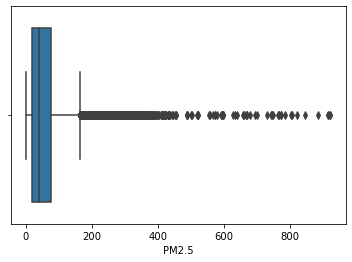

In [77]:
sns.boxplot(df['PM2.5'])

In [78]:
outliers=findoutliers(df['PM2.5'])
print("no of outliers"+str(len(outliers)))
print("max outlier value "+str(outliers.max()))
print("min outlier value "+str(outliers.min()))


no of outliers2144
max outlier value 923.08
min outlier value 163.28


In [80]:
df2=df['PM2.5']


In [81]:
q3=df2.quantile(0.75)
q1=df2.quantile(0.25)
IQR=q3-q1
r=q3+1.5*IQR
df2[df2>r]

From Date
2019-02-21 19:00:00    260.10
2019-02-21 20:00:00    263.81
2019-02-21 21:00:00    203.58
2019-02-21 22:00:00    217.14
2019-02-21 23:00:00    194.00
                        ...  
2022-12-30 20:00:00    295.72
2022-12-30 21:00:00    362.60
2022-12-30 22:00:00    277.86
2022-12-30 23:00:00    380.00
2022-12-31 00:00:00    295.00
Name: PM2.5, Length: 2144, dtype: float64

In [82]:
len(df2[df2>450])

53

In [84]:
r=450
df['PM2.5']=np.where(df['PM2.5']>r,r,df['PM2.5'])

#r = 450: This sets the value of r to 450, which is the maximum value you want to use to cap the 
#'PM2.5' column.

In [85]:
df['PM2.5'].describe()

count    33067.000000
mean        59.371408
std         60.257267
min          0.060000
25%         18.900000
50%         39.750000
75%         76.640000
max        450.000000
Name: PM2.5, dtype: float64

C:\Users\SURUJ_KALITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM2.5'>

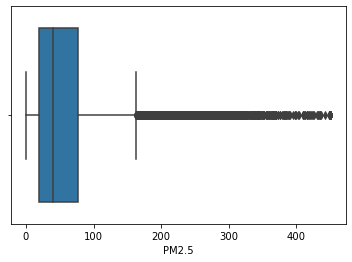

In [90]:
sns.boxplot(df['PM2.5'])

C:\Users\SURUJ_KALITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NO2'>

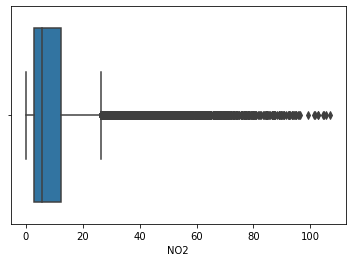

In [91]:
sns.boxplot(df['NO2'])

In [92]:
outliers=findoutliers(df['NO2'])
print("no of outliers"+str(len(outliers)))
print("max outlier value "+str(outliers.max()))
print("min outlier value "+str(outliers.min()))


no of outliers2297
max outlier value 107.04
min outlier value 26.44


In [93]:
df3=df['NO2']


In [94]:
q3=df3.quantile(0.75)
q1=df3.quantile(0.25)
IQR=q3-q1
r=q3+1.5*IQR
df3[df3>r]  

##Removing outiers

From Date
2019-02-20 20:00:00    30.09
2019-02-21 18:00:00    32.60
2019-02-21 19:00:00    35.39
2019-02-21 20:00:00    31.88
2019-02-22 12:00:00    28.63
                       ...  
2021-04-30 18:00:00    44.28
2021-04-30 19:00:00    45.46
2021-02-05 21:00:00    37.77
2021-02-05 22:00:00    40.99
2021-02-05 23:00:00    34.23
Name: NO2, Length: 2297, dtype: float64

In [96]:
len(df3[df3>80])

71

In [98]:
r=80
df['NO2']=np.where(df['NO2']>r,r,df['NO2'])

#r = 450: This sets the value of r to 450, which is the maximum value you want to use to cap the 'PM2.5' column.

In [99]:
df['NO2'].describe()

count    33067.000000
mean         9.816523
std         10.957694
min          0.020000
25%          2.690000
50%          5.770000
75%         12.190000
max         80.000000
Name: NO2, dtype: float64

C:\Users\SURUJ_KALITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SO2'>

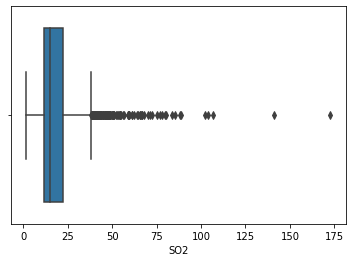

In [100]:
sns.boxplot(df['SO2'])


In [101]:

df4=df['SO2']

In [102]:

r=80
df['SO2']=np.where(df['SO2']>r,r,df['SO2'])

C:\Users\SURUJ_KALITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SO2'>

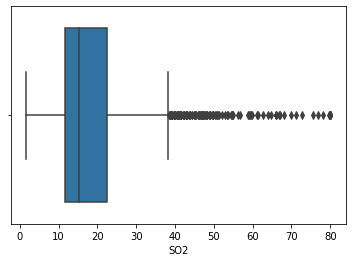

In [103]:
sns.boxplot(df['SO2'])

C:\Users\SURUJ_KALITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AT'>

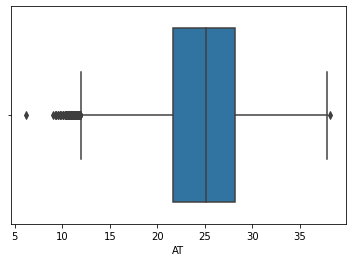

In [104]:

sns.boxplot(df['AT'])

In [105]:
r=12
df['AT']=np.where(df['AT']<r,r,df['AT'])

C:\Users\SURUJ_KALITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AT'>

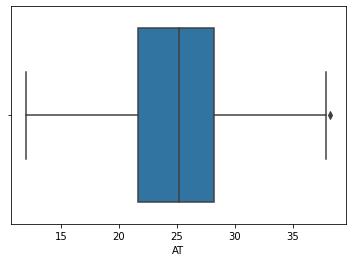

In [106]:
sns.boxplot(df['AT'])

In [107]:
df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,WS,WD,SR,BP,AT,RF
From Date,,,,,,,,,,,,,,,,,,
2019-02-18 00:00:00,58.04,81.06,1.81,6.40,9.66,27.18,13.77,0.49,15.73,0.92,NaN,0.33,1.86,229.44,0.220000,1002.19,20.87,0.00
2019-02-18 01:00:00,60.00,82.39,1.91,6.08,9.7,26.46,13.64,0.44,18.36,0.84,NaN,0.29,1.54,217.20,1.460000,956.00,18.92,0.24
2019-02-18 02:00:00,55.50,73.42,2.22,6.71,10.86,27.06,13.64,0.44,34.54,0.77,NaN,0.23,0.66,197.21,241.906008,1001.60,18.33,0.00
2019-02-18 03:00:00,66.56,96.04,2.79,7.00,12.1,26.34,13.72,0.45,31.85,0.82,NaN,0.21,0.61,206.44,241.906008,1001.41,17.63,0.00
2019-02-18 04:00:00,67.08,97.21,3.29,9.45,15.53,25.16,13.80,0.47,24.07,0.74,NaN,0.22,0.54,230.53,241.906008,980.67,16.61,0.00


In [111]:
df.shape
## rows and column 

(33067, 18)

In [ ]:
https://www.kaggle.com/code/ttunjic/gans-for-tabular-data

##ON CENSUS DATASETS